In [1]:
import numpy as np
import pandas as pd

In [2]:
data_23 = pd.read_csv("data/0901_Tek023.csv")
data_24 = pd.read_csv("data/0901_Tek024.csv")
data_25 = pd.read_csv("data/0901_Tek025.csv")
data_31 = pd.read_csv("data/0901_Tek031.csv")

In [3]:
print(data_31)

             n  vth_average            t
0            0     0.897816      0.00000
1            1     1.026272      0.00001
2            2     1.048362      0.00002
3            4     1.071285      0.00004
4            8     1.100969      0.00008
5           16     1.123731      0.00016
6           32     1.141961      0.00032
7           64     1.158543      0.00064
8          128     1.183770      0.00128
9          256     1.201427      0.00256
10         512     1.221689      0.00512
11        1024     1.246545      0.01024
12        2048     1.267370      0.02048
13        4096     1.294843      0.04096
14        8192     1.316228      0.08192
15       16384     1.335845      0.16384
16       32768     1.353571      0.32768
17       65536     1.378966      0.65536
18      131072     1.398590      1.31072
19      262144     1.414390      2.62144
20      524288     1.427069      5.24288
21     1048576     1.446973     10.48576
22     2097152     1.461066     20.97152
23     4194304  

In [4]:
data_23.head()

,n,vth_average,t
0,0,0.914897,0.00000
1,1,1.012521,0.00001
2,2,1.030124,0.00002
3,4,1.053786,0.00004
4,8,1.073705,0.00008


In [5]:
# For example: use data driven LSTM ML to predict dynamic Vth at 10000s using just first 100s
# NEED EITHER: MORE TRIALS, less sparse time data for first 100s, or ideally both
# For the time being, test predict 10000 values on the first 10 values
first_100 = data_23[0:25]

/Users/titanjuels/Documents/HKUST/FYP/model/fypenv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='t', ylabel='vth_average'>

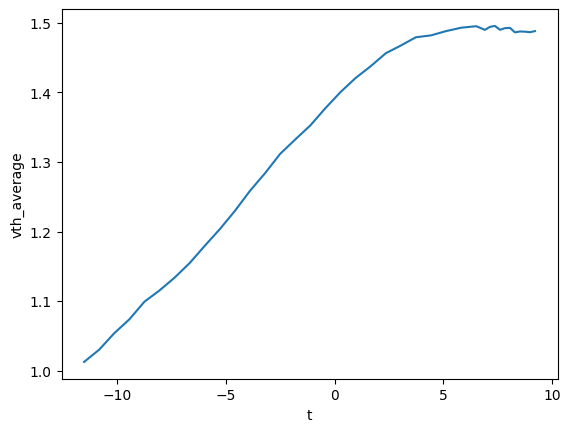

In [6]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

sns.lineplot(x=np.log(data_23["t"]), y=data_23["vth_average"])

In [7]:
epsilon = 1e-9
X_train = np.log(data_23["t"][0:25].values + epsilon).reshape(-1, 1)
y_train = data_23["vth_average"][0:25].values

X_test = np.log(data_23["t"][25:].values + epsilon).reshape(-1, 1)
y_test = data_23["vth_average"][25:].values

In [8]:
# Random Forest Regression

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest MSE: 0.0001302112736985737


In [9]:
# Neural Netwok

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
y_pred_mlp_train = mlp.predict(X_train_scaled)

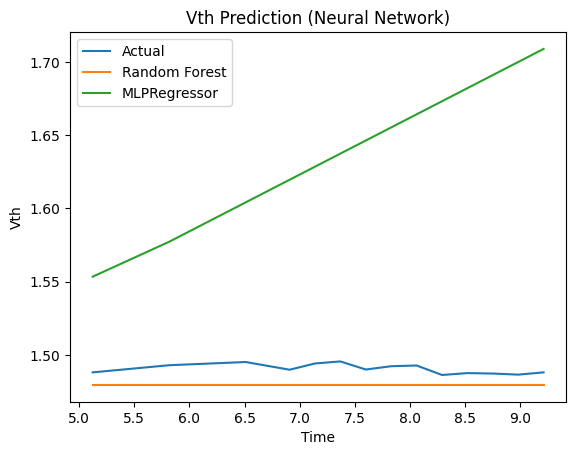

In [10]:
# Prediction Plots

import matplotlib.pyplot as plt

plt.plot(np.log(data_23["t"][25:] + epsilon), y_test, label="Actual")
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_rf, label="Random Forest")
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_mlp, label="MLPRegressor")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Vth")
plt.title("Vth Prediction (Neural Network)")
plt.show()

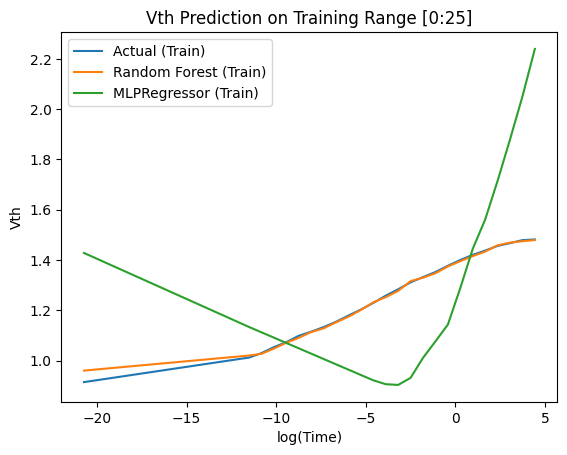

In [11]:
# Predict on training data
y_pred_rf_train = rf.predict(X_train)
y_pred_mlp_train = mlp.predict(X_train)

# Plot actual vs predicted for training range
import matplotlib.pyplot as plt

plt.plot(np.log(data_23["t"][0:25] + epsilon), y_train, label="Actual (Train)")
plt.plot(np.log(data_23["t"][0:25] + epsilon), y_pred_rf_train, label="Random Forest (Train)")
plt.plot(np.log(data_23["t"][0:25] + epsilon), y_pred_mlp_train, label="MLPRegressor (Train)")
plt.legend()
plt.xlabel("log(Time)")
plt.ylabel("Vth")
plt.title("Vth Prediction on Training Range [0:25]")
plt.show()

MLPRegressor (raw time) MSE: 0.9337977859204738


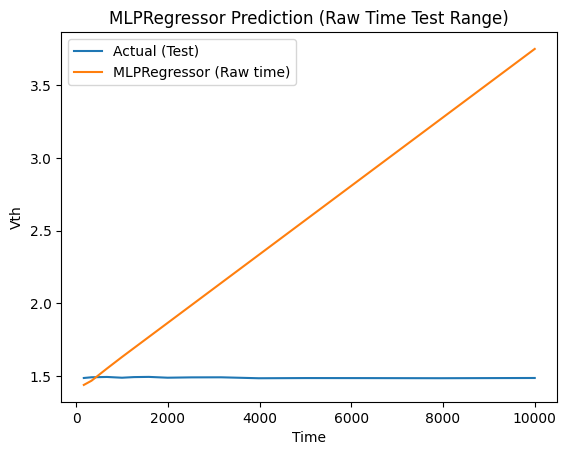

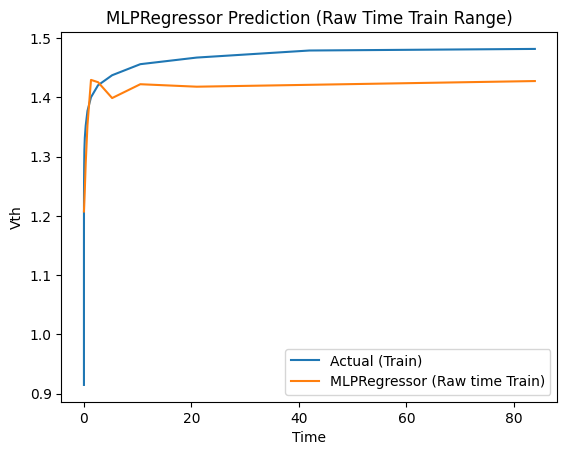

In [12]:
# Prepare train/test data using raw time (not log)
X_train_raw = data_23["t"][0:25].values.reshape(-1, 1)
X_test_raw = data_23["t"][25:].values.reshape(-1, 1)

# Train MLPRegressor on raw time
mlp_raw = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_raw.fit(X_train_raw, y_train)
y_pred_mlp_raw = mlp_raw.predict(X_test_raw)
y_pred_mlp_raw_train = mlp_raw.predict(X_train_raw)

print("MLPRegressor (raw time) MSE:", mean_squared_error(y_test, y_pred_mlp_raw))

# Plot predictions on test range
plt.plot(data_23["t"][25:], y_test, label="Actual (Test)")
plt.plot(data_23["t"][25:], y_pred_mlp_raw, label="MLPRegressor (Raw time)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Vth")
plt.title("MLPRegressor Prediction (Raw Time Test Range)")
plt.show()

# Plot predictions on training range
plt.plot(data_23["t"][0:25], y_train, label="Actual (Train)")
plt.plot(data_23["t"][0:25], y_pred_mlp_raw_train, label="MLPRegressor (Raw time Train)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Vth")
plt.title("MLPRegressor Prediction (Raw Time Train Range)")
plt.show()

# Training on first 1000s and predicting 10000s

Actual Vth at 10000s: 1.494168895
Random Forest predicted Vth at 10000s: 1.49117863778
MLPRegressor predicted Vth at 10000s: 1.5637338251914086


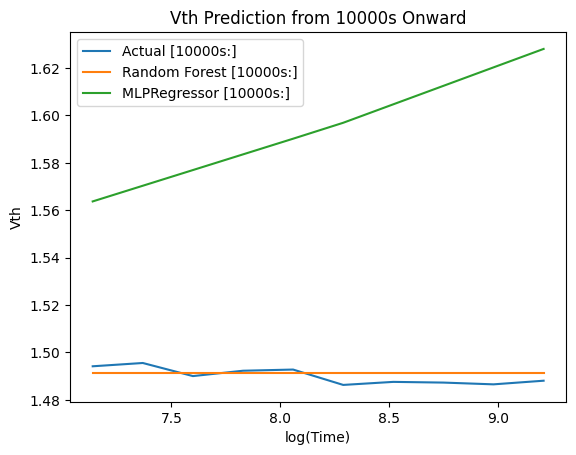

In [13]:
epsilon = 1e-9

# Prepare train data (first 1000s)
train_mask = data_23["t"] <= 1000
X_train_1000 = np.log(data_23["t"][train_mask].values + epsilon).reshape(-1, 1)
y_train_1000 = data_23["vth_average"][train_mask].values

# Prepare test data
# idx_10000 = (np.abs(data_23["t"] - 10000)).idxmin()
idx_10000 = 29
X_test_10000 = np.log(np.array([data_23["t"][idx_10000] + epsilon])).reshape(-1, 1)
y_test_10000 = np.array([data_23["vth_average"][idx_10000]])

X_test_10000plus = np.log(data_23["t"][idx_10000:].values + epsilon).reshape(-1, 1)
y_test_10000plus = data_23["vth_average"][idx_10000:].values

# Scaling
from sklearn.preprocessing import StandardScaler
scaler_1000 = StandardScaler()
X_train_1000_scaled = scaler_1000.fit_transform(X_train_1000)
X_test_10000_scaled = scaler_1000.transform(X_test_10000)
X_test_10000plus_scaled = scaler_1000.transform(X_test_10000plus)

# Train models
rf_1000 = RandomForestRegressor()
rf_1000.fit(X_train_1000, y_train_1000)
y_pred_rf_10000 = rf_1000.predict(X_test_10000)
y_pred_rf_10000plus = rf_1000.predict(X_test_10000plus)

mlp_1000 = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_1000.fit(X_train_1000_scaled, y_train_1000)
y_pred_mlp_10000 = mlp_1000.predict(X_test_10000_scaled)
y_pred_mlp_10000plus = mlp_1000.predict(X_test_10000plus_scaled)

# Print single value predictions
print("Actual Vth at 10000s:", y_test_10000[0])
print("Random Forest predicted Vth at 10000s:", y_pred_rf_10000[0])
print("MLPRegressor predicted Vth at 10000s:", y_pred_mlp_10000[0])

# Plot predictions vs actual for [idx_10000:] range
import matplotlib.pyplot as plt
plt.plot(np.log(data_23["t"][idx_10000:] + epsilon), y_test_10000plus, label="Actual [10000s:]")
plt.plot(np.log(data_23["t"][idx_10000:] + epsilon), y_pred_rf_10000plus, label="Random Forest [10000s:]")
plt.plot(np.log(data_23["t"][idx_10000:] + epsilon), y_pred_mlp_10000plus, label="MLPRegressor [10000s:]")
plt.legend()
plt.xlabel("log(Time)")
plt.ylabel("Vth")
plt.title("Vth Prediction from 10000s Onward")
plt.show()

## Measure MSE (Lower is better)

In [14]:
print("Random Forest MSE ([25:]):", mean_squared_error(y_test, y_pred_rf))
print("MLPRegressor MSE ([25:]):", mean_squared_error(y_test, y_pred_mlp))
print("MLPRegressor (raw time) MSE ([25:]):", mean_squared_error(y_test, y_pred_mlp_raw))

Random Forest MSE ([25:]): 0.0001302112736985737
MLPRegressor MSE ([25:]): 0.026246530055570906
MLPRegressor (raw time) MSE ([25:]): 0.9337977859204738


In [15]:
print("Random Forest MSE (train [0:25]):", mean_squared_error(y_train, y_pred_rf_train))
print("MLPRegressor MSE (train [0:25]):", mean_squared_error(y_train, y_pred_mlp_train))
print("MLPRegressor (raw time) MSE (train [0:25]):", mean_squared_error(y_train, y_pred_mlp_raw_train))

Random Forest MSE (train [0:25]): 0.0001022941913270263
MLPRegressor MSE (train [0:25]): 0.09440609693622637
MLPRegressor (raw time) MSE (train [0:25]): 0.010593336401465446


In [16]:
print("Random Forest MSE (10000s single value):", mean_squared_error(y_test_10000, y_pred_rf_10000))
print("MLPRegressor MSE (10000s single value):", mean_squared_error(y_test_10000, y_pred_mlp_10000))

Random Forest MSE (10000s single value): 8.941638241762214e-06
MLPRegressor MSE (10000s single value): 0.004839279512535541


In [17]:
print("Random Forest MSE ([10000s:]):", mean_squared_error(y_test_10000plus, y_pred_rf_10000plus))
print("MLPRegressor MSE ([10000s:]):", mean_squared_error(y_test_10000plus, y_pred_mlp_10000plus))

Random Forest MSE ([10000s:]): 1.1607603278664767e-05
MLPRegressor MSE ([10000s:]): 0.011493276887416377


# LSTM Model

Epoch 1/100


/Users/titanjuels/Documents/HKUST/FYP/model/fypenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step - loss: 0.4555
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4487
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4419
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4352
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4285
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4219
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4154
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4089
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4025
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3962
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3900
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3838
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3776
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3716
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3656
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10

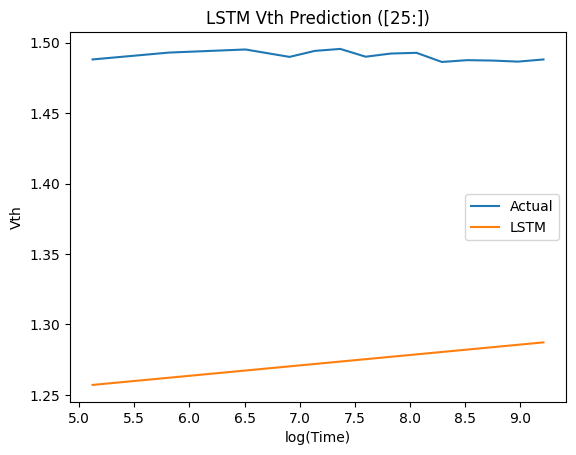

In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare train/test data (example: first 25 for train, rest for test)
epsilon = 1e-9
X_train = np.log(data_23["t"][0:25].values + epsilon).reshape(-1, 1)
y_train = data_23["vth_average"][0:25].values
X_test = np.log(data_23["t"][25:].values + epsilon).reshape(-1, 1)
y_test = data_23["vth_average"][25:].values

# Scale features for LSTM
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape for LSTM: (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential([
    LSTM(32, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_train_lstm, y_train_scaled, epochs=100, verbose=1)

# Predict
y_pred_lstm_scaled = model.predict(X_test_lstm)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)

# Measure MSE
from sklearn.metrics import mean_squared_error
print("LSTM MSE ([25:]):", mean_squared_error(y_test, y_pred_lstm))

# Plot
import matplotlib.pyplot as plt
plt.plot(np.log(data_23["t"][25:] + epsilon), y_test, label="Actual")
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_lstm, label="LSTM")
plt.legend()
plt.xlabel("log(Time)")
plt.ylabel("Vth")
plt.title("LSTM Vth Prediction ([25:])")
plt.show()

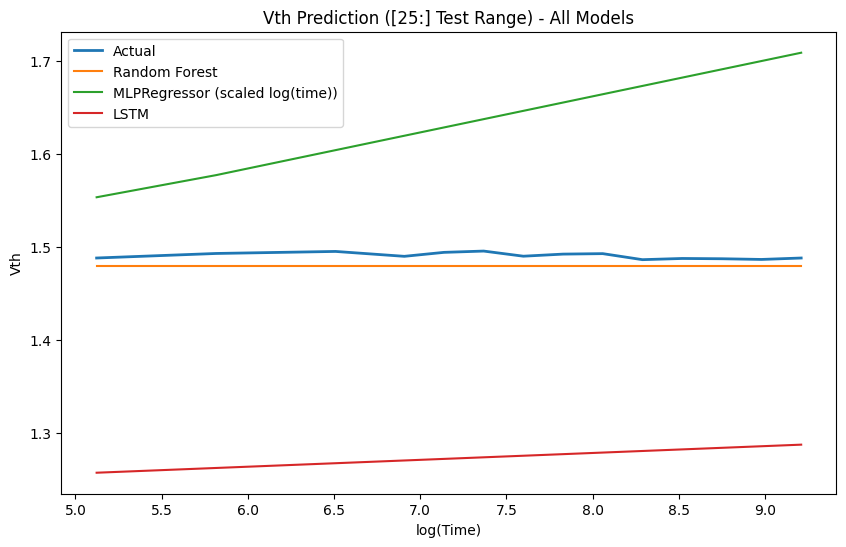

In [19]:
# now plot everything again
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.log(data_23["t"][25:] + epsilon), y_test, label="Actual", linewidth=2)
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_rf, label="Random Forest")
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_mlp, label="MLPRegressor (scaled log(time))")
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_lstm, label="LSTM")
plt.legend()
plt.xlabel("log(Time)")
plt.ylabel("Vth")
plt.title("Vth Prediction ([25:] Test Range) - All Models")
plt.show()

## Baseline accuracy: train on early window → predict 10000s

This section establishes a baseline extrapolation accuracy by training only on early-time data:
- Window A: $t \in [1, 100]$ seconds
- Window B: $t \in [1, 1000]$ seconds

We evaluate:
- **Target error @ 10000s** (absolute error and squared error)
- **Held-out error on all later points** ($t > t_{max}$): MSE / RMSE / MAE / $R^2$

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


def _safe_metrics(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    mse = mean_squared_error(y_true, y_pred)
    rmse = float(np.sqrt(mse))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred) if len(y_true) >= 2 else np.nan
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}


def run_baseline_window(
    df,
    train_t_max,
    target_t=10000.0,
    train_t_min=1.0,
    epsilon=1e-9,
    rf_params=None,
    mlp_params=None,
):
    """Train on t in [train_t_min, train_t_max] and evaluate extrapolation."""

    t = df["t"].astype(float).values
    y = df["vth_average"].astype(float).values

    train_mask = (t >= train_t_min) & (t <= train_t_max)
    test_mask = t > train_t_max

    if train_mask.sum() < 3:
        raise ValueError(f"Too few training points for window [{train_t_min}, {train_t_max}] (n={train_mask.sum()}).")
    if test_mask.sum() < 2:
        raise ValueError(f"Too few test points for t>{train_t_max} (n={test_mask.sum()}).")

    # Feature: log time
    X_train = np.log(t[train_mask] + epsilon).reshape(-1, 1)
    y_train = y[train_mask]
    X_test = np.log(t[test_mask] + epsilon).reshape(-1, 1)
    y_test = y[test_mask]

    # Target point (closest available sample to target_t)
    idx_target = int(np.argmin(np.abs(t - target_t)))
    t_target_actual = float(t[idx_target])
    y_target_actual = float(y[idx_target])
    X_target = np.log(np.array([[t_target_actual + epsilon]]))

    # Defaults
    rf_params = rf_params or {"n_estimators": 300, "random_state": 42}
    mlp_params = mlp_params or {"hidden_layer_sizes": (64, 32), "max_iter": 5000, "random_state": 42}

    results = []

    # 1) Linear regression baseline
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    y_pred_test = lin.predict(X_test)
    y_pred_target = float(lin.predict(X_target)[0])
    m = _safe_metrics(y_test, y_pred_test)
    results.append(
        {
            "Window": f"[1, {int(train_t_max)}]s",
            "Model": "LinearRegression",
            "n_train": int(train_mask.sum()),
            "n_test": int(test_mask.sum()),
            "t_target": t_target_actual,
            "Vth_target_actual": y_target_actual,
            "Vth_target_pred": y_pred_target,
            "AbsErr@target": abs(y_target_actual - y_pred_target),
            "SqErr@target": (y_target_actual - y_pred_target) ** 2,
            "Test_MSE": m["MSE"],
            "Test_RMSE": m["RMSE"],
            "Test_MAE": m["MAE"],
            "Test_R2": m["R2"],
        }
    )

    # 2) Random Forest
    rf = RandomForestRegressor(**rf_params)
    rf.fit(X_train, y_train)
    y_pred_test = rf.predict(X_test)
    y_pred_target = float(rf.predict(X_target)[0])
    m = _safe_metrics(y_test, y_pred_test)
    results.append(
        {
            "Window": f"[1, {int(train_t_max)}]s",
            "Model": "RandomForestRegressor",
            "n_train": int(train_mask.sum()),
            "n_test": int(test_mask.sum()),
            "t_target": t_target_actual,
            "Vth_target_actual": y_target_actual,
            "Vth_target_pred": y_pred_target,
            "AbsErr@target": abs(y_target_actual - y_pred_target),
            "SqErr@target": (y_target_actual - y_pred_target) ** 2,
            "Test_MSE": m["MSE"],
            "Test_RMSE": m["RMSE"],
            "Test_MAE": m["MAE"],
            "Test_R2": m["R2"],
        }
    )

    # 3) MLP (scaled)
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    X_target_s = scaler.transform(X_target)

    mlp = MLPRegressor(**mlp_params)
    mlp.fit(X_train_s, y_train)
    y_pred_test = mlp.predict(X_test_s)
    y_pred_target = float(mlp.predict(X_target_s)[0])
    m = _safe_metrics(y_test, y_pred_test)
    results.append(
        {
            "Window": f"[1, {int(train_t_max)}]s",
            "Model": "MLPRegressor",
            "n_train": int(train_mask.sum()),
            "n_test": int(test_mask.sum()),
            "t_target": t_target_actual,
            "Vth_target_actual": y_target_actual,
            "Vth_target_pred": y_pred_target,
            "AbsErr@target": abs(y_target_actual - y_pred_target),
            "SqErr@target": (y_target_actual - y_pred_target) ** 2,
            "Test_MSE": m["MSE"],
            "Test_RMSE": m["RMSE"],
            "Test_MAE": m["MAE"],
            "Test_R2": m["R2"],
        }
    )

    return pd.DataFrame(results)


# Run baseline for the two windows requested
baseline_100 = run_baseline_window(data_23, train_t_max=100)
baseline_1000 = run_baseline_window(data_23, train_t_max=1000)

baseline_df = pd.concat([baseline_100, baseline_1000], ignore_index=True)

# Display sorted by target absolute error
print("Baseline extrapolation results (sorted by |error| at target):")
baseline_df.sort_values(["Window", "AbsErr@target"], ascending=[True, True])

Baseline extrapolation results (sorted by |error| at target):


,Window,Model,n_train,n_test,t_target,Vth_target_actual,Vth_target_pred,AbsErr@target,SqErr@target,Test_MSE,Test_RMSE,Test_MAE,Test_R2
4,"[1, 1000]s",RandomForestRegressor,11,10,10000.0,1.488081,1.491088,0.003008,0.000009,0.000011,0.003379,0.003114,-0.100956
3,"[1, 1000]s",LinearRegression,11,10,10000.0,1.488081,1.537887,0.049806,0.002481,0.001291,0.035928,0.033998,-123.504865
5,"[1, 1000]s",MLPRegressor,11,10,10000.0,1.488081,1.650848,0.162767,0.026493,0.010704,0.103459,0.093715,-1031.424411
1,"[1, 100]s",RandomForestRegressor,7,14,10000.0,1.488081,1.480125,0.007955,0.000063,0.000117,0.010829,0.010358,-10.762930
0,"[1, 100]s",LinearRegression,7,14,10000.0,1.488081,1.587534,0.099453,0.009891,0.004729,0.068770,0.064107,-473.420747
2,"[1, 100]s",MLPRegressor,7,14,10000.0,1.488081,2.075325,0.587244,0.344856,0.154464,0.393019,0.364539,-15493.945297


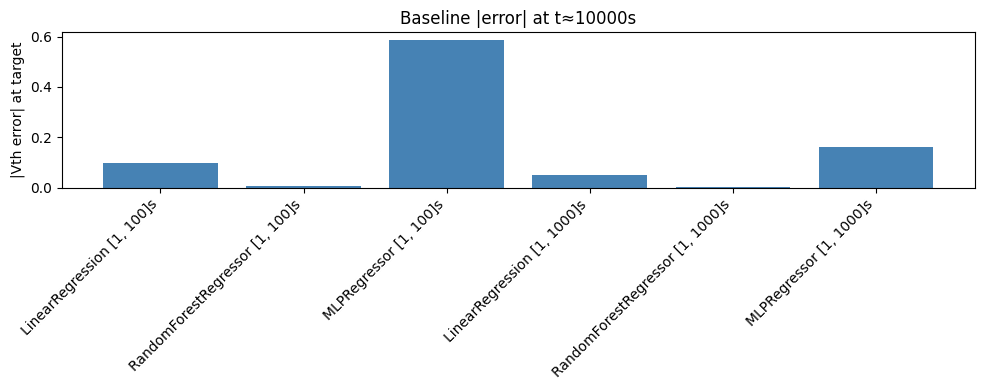

,Window,Model,n_train,n_test,t_target,Vth_target_actual,Vth_target_pred,AbsErr@target,SqErr@target,Test_MSE,Test_RMSE,Test_MAE,Test_R2
4,"[1, 1000]s",RandomForestRegressor,11,10,10000.0,1.488081,1.491088,0.003008,0.000009,0.000011,0.003379,0.003114,-0.100956
3,"[1, 1000]s",LinearRegression,11,10,10000.0,1.488081,1.537887,0.049806,0.002481,0.001291,0.035928,0.033998,-123.504865
5,"[1, 1000]s",MLPRegressor,11,10,10000.0,1.488081,1.650848,0.162767,0.026493,0.010704,0.103459,0.093715,-1031.424411
1,"[1, 100]s",RandomForestRegressor,7,14,10000.0,1.488081,1.480125,0.007955,0.000063,0.000117,0.010829,0.010358,-10.762930
0,"[1, 100]s",LinearRegression,7,14,10000.0,1.488081,1.587534,0.099453,0.009891,0.004729,0.068770,0.064107,-473.420747
2,"[1, 100]s",MLPRegressor,7,14,10000.0,1.488081,2.075325,0.587244,0.344856,0.154464,0.393019,0.364539,-15493.945297


In [21]:
import matplotlib.pyplot as plt

# Quick visualization: abs error at the (closest) 10000s point
plt.figure(figsize=(10, 4))
plot_df = baseline_df.copy()
plot_df["Label"] = plot_df["Model"] + " " + plot_df["Window"]
plt.bar(plot_df["Label"], plot_df["AbsErr@target"], color="steelblue")
plt.ylabel("|Vth error| at target")
plt.title(f"Baseline |error| at t≈{plot_df['t_target'].iloc[0]:.0f}s")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Optional: show the full held-out metrics table
baseline_df.sort_values(["Window", "Test_MSE"], ascending=[True, True])

## Full-curve prediction overlay (baseline vs LSTM+physics)

This evaluates the *entire predicted trajectory* (not only the endpoint):
- Train on early window ($t\in[1,t_{max}]$)
- Predict for all later measured points ($t>t_{max}$)
- Plot **Actual vs Predicted** over the full time range

Note: the LSTM+physics training below is configured to be reasonably fast for visualization (smaller model and fewer collocation points).

[curve 100s] epoch 100/400 | total=0.01246 data=0.009024 mono=1.564e-05 curv=0.01367
[curve 100s] epoch 200/400 | total=0.004313 data=0.001859 mono=0 curv=0.009812
[curve 100s] epoch 300/400 | total=0.003729 data=0.00132 mono=0 curv=0.009634
[curve 100s] epoch 400/400 | total=0.003562 data=0.001218 mono=0 curv=0.009377


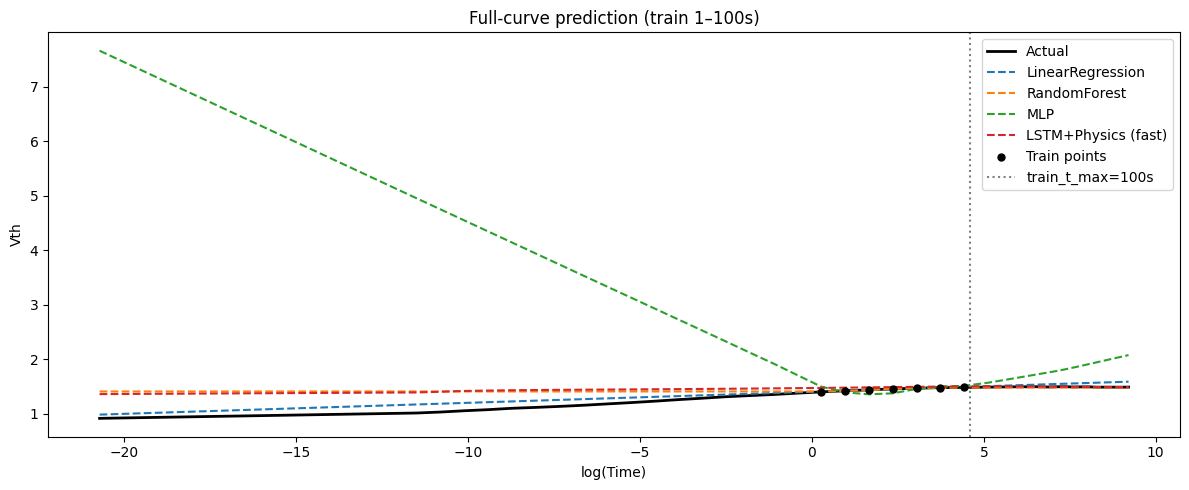

Tail metrics for t>100s:
  Linear: {'MSE': 0.0047293338572120276, 'RMSE': 0.06877015237159234, 'MAE': 0.06410704376704383, 'R2': -473.4207468981656}
  RF:     {'MSE': 0.00011726051455675789, 'RMSE': 0.010828689420089483, 'MAE': 0.010358178684290311, 'R2': -10.762929532421511}
  MLP:    {'MSE': 0.15446366940363312, 'RMSE': 0.3930186629202653, 'MAE': 0.36453910786186056, 'R2': -15493.945296651656}
  LSTM+P: {'MSE': 2.410651947714917e-05, 'RMSE': 0.004909839047988148, 'MAE': 0.003590705775460374, 'R2': -1.418233375092333}
[curve 1000s] epoch 100/400 | total=0.02546 data=0.0221 mono=0.0001456 curv=0.01286
[curve 1000s] epoch 200/400 | total=0.00541 data=0.002782 mono=0 curv=0.01051
[curve 1000s] epoch 300/400 | total=0.004403 data=0.001995 mono=0 curv=0.009631
[curve 1000s] epoch 400/400 | total=0.003708 data=0.001374 mono=0 curv=0.009337


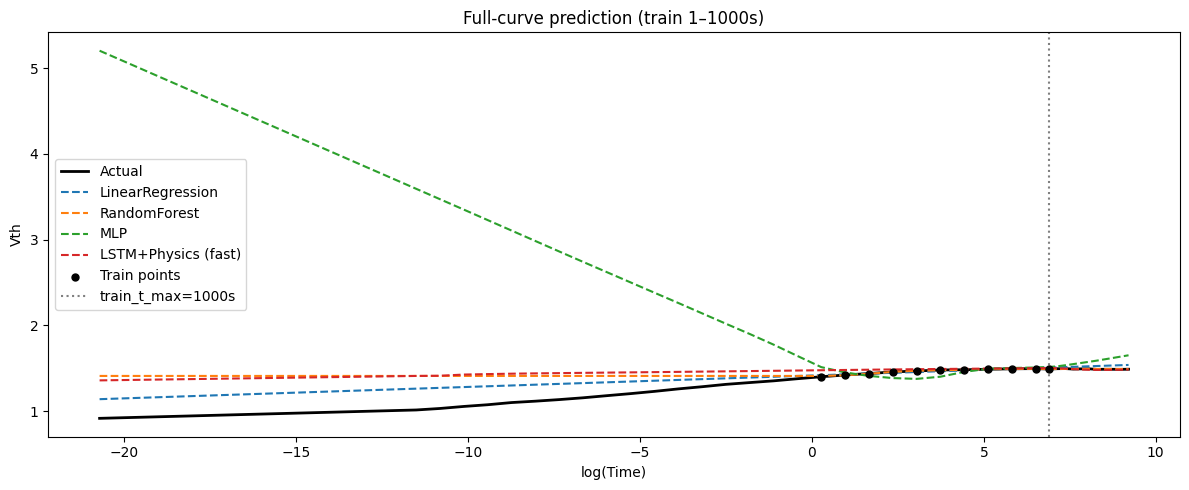

Tail metrics for t>1000s:
  Linear: {'MSE': 0.001290818184394165, 'RMSE': 0.03592795825529423, 'MAE': 0.033997729718746775, 'R2': -123.50486528968473}
  RF:     {'MSE': 1.1414283022119253e-05, 'RMSE': 0.003378503074161581, 'MAE': 0.0031137746439983127, 'R2': -0.10095580247367719}
  MLP:    {'MSE': 0.010703776116370804, 'RMSE': 0.10345905526521496, 'MAE': 0.09371528404854937, 'R2': -1031.4244107896345}
  LSTM+P: {'MSE': 4.070114275865758e-05, 'RMSE': 0.006379744725195325, 'MAE': 0.005521523584899879, 'R2': -2.9257971088168966}


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def _fit_baseline_models(df, train_t_max, train_t_min=1.0, epsilon=1e-9):
    t = df["t"].astype(float).values
    y = df["vth_average"].astype(float).values

    train_mask = (t >= train_t_min) & (t <= train_t_max)

    X_train = np.log(t[train_mask] + epsilon).reshape(-1, 1)
    y_train = y[train_mask]

    lin = LinearRegression().fit(X_train, y_train)

    rf = RandomForestRegressor(n_estimators=300, random_state=42)
    rf.fit(X_train, y_train)

    x_scaler = StandardScaler()
    X_train_s = x_scaler.fit_transform(X_train)
    mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=5000, random_state=42)
    mlp.fit(X_train_s, y_train)

    return {
        "lin": lin,
        "rf": rf,
        "mlp": mlp,
        "mlp_scaler": x_scaler,
    }


def _train_phys_lstm_for_curve(
    df,
    train_t_max,
    target_t=10000.0,
    train_t_min=1.0,
    epsilon=1e-9,
    epochs=400,
    lr=2e-3,
    alpha=1.0,
    beta=0.25,
    n_phys=64,
    patience=60,
    seed=42,
):
    """Smaller LSTM+physics model for full-curve visualization (faster)."""

    tf.random.set_seed(seed)
    np.random.seed(seed)

    t = df["t"].astype(float).values
    y = df["vth_average"].astype(float).values

    train_mask = (t >= train_t_min) & (t <= train_t_max)

    x_train = np.log(t[train_mask] + epsilon).reshape(-1, 1)
    y_train = y[train_mask].reshape(-1, 1)

    # Standardize using training window
    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    x_train_s = x_scaler.fit_transform(x_train)
    y_train_s = y_scaler.fit_transform(y_train)

    X_train_seq = tf.constant(x_train_s.reshape(1, -1, 1), dtype=tf.float32)
    Y_train_seq = tf.constant(y_train_s.reshape(1, -1, 1), dtype=tf.float32)

    # Collocation grid up to target
    t_phys = np.geomspace(train_t_min, target_t, n_phys)
    x_phys = np.log(t_phys + epsilon).reshape(-1, 1)
    x_phys_s = x_scaler.transform(x_phys)
    X_phys_seq = tf.constant(x_phys_s.reshape(1, -1, 1), dtype=tf.float32)

    model = keras.Sequential(
        [
            layers.Input(shape=(None, 1)),
            layers.LSTM(16, return_sequences=True),
            layers.LSTM(16, return_sequences=True),
            layers.Dense(16, activation="tanh"),
            layers.Dense(1),
        ]
    )

    opt = keras.optimizers.Adam(learning_rate=lr)

    @tf.function
    def train_step():
        with tf.GradientTape() as tape:
            yhat_train = model(X_train_seq, training=True)
            data_loss = tf.reduce_mean(tf.square(yhat_train - Y_train_seq))

            yhat_phys = model(X_phys_seq, training=True)
            dy = yhat_phys[:, 1:, :] - yhat_phys[:, :-1, :]
            d2y = yhat_phys[:, 2:, :] - 2.0 * yhat_phys[:, 1:-1, :] + yhat_phys[:, :-2, :]
            mono_pen = tf.reduce_mean(tf.nn.relu(-dy))
            curv_pen = tf.reduce_mean(tf.nn.relu(-d2y))

            total = data_loss + alpha * mono_pen + beta * curv_pen

        grads = tape.gradient(total, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))
        return total, data_loss, mono_pen, curv_pen

    best = np.inf
    best_weights = None
    wait = 0

    for epoch in range(1, epochs + 1):
        total, data_loss, mono_pen, curv_pen = train_step()
        tl = float(total.numpy())

        if tl + 1e-9 < best:
            best = tl
            best_weights = model.get_weights()
            wait = 0
        else:
            wait += 1

        if epoch % 100 == 0:
            print(
                f"[curve {int(train_t_max)}s] epoch {epoch}/{epochs} | total={tl:.4g} "
                f"data={float(data_loss.numpy()):.4g} mono={float(mono_pen.numpy()):.4g} curv={float(curv_pen.numpy()):.4g}"
            )

        if wait >= patience:
            break

    if best_weights is not None:
        model.set_weights(best_weights)

    return model, x_scaler, y_scaler


def plot_full_curve(df, train_t_max, epsilon=1e-9):
    t = df["t"].astype(float).values
    y = df["vth_average"].astype(float).values
    log_t = np.log(t + epsilon)

    # Fit baselines
    base = _fit_baseline_models(df, train_t_max=train_t_max, epsilon=epsilon)

    X_all = log_t.reshape(-1, 1)
    pred_lin = base["lin"].predict(X_all)
    pred_rf = base["rf"].predict(X_all)
    pred_mlp = base["mlp"].predict(base["mlp_scaler"].transform(X_all))

    # Train smaller LSTM+physics and predict full curve
    lstm_model, x_scaler, y_scaler = _train_phys_lstm_for_curve(df, train_t_max=train_t_max, epsilon=epsilon)
    X_all_s = x_scaler.transform(X_all)
    X_all_seq = tf.constant(X_all_s.reshape(1, -1, 1), dtype=tf.float32)
    pred_lstm_s = lstm_model(X_all_seq, training=False).numpy().reshape(-1, 1)
    pred_lstm = y_scaler.inverse_transform(pred_lstm_s).reshape(-1)

    train_mask = (t >= 1.0) & (t <= train_t_max)

    plt.figure(figsize=(12, 5))
    plt.plot(log_t, y, "k-", linewidth=2, label="Actual")
    plt.plot(log_t, pred_lin, "--", label="LinearRegression")
    plt.plot(log_t, pred_rf, "--", label="RandomForest")
    plt.plot(log_t, pred_mlp, "--", label="MLP")
    plt.plot(log_t, pred_lstm, "--", label="LSTM+Physics (fast)")

    # Highlight training region
    plt.scatter(log_t[train_mask], y[train_mask], color="black", s=25, zorder=5, label="Train points")

    plt.axvline(np.log(train_t_max + epsilon), color="gray", linestyle=":", label=f"train_t_max={train_t_max}s")
    plt.xlabel("log(Time)")
    plt.ylabel("Vth")
    plt.title(f"Full-curve prediction (train 1–{int(train_t_max)}s)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Quantitative tail error (t > train_t_max)
    test_mask = t > train_t_max
    if test_mask.sum() >= 2:
        print(f"Tail metrics for t>{train_t_max}s:")
        print("  Linear:", _safe_metrics(y[test_mask], pred_lin[test_mask]))
        print("  RF:    ", _safe_metrics(y[test_mask], pred_rf[test_mask]))
        print("  MLP:   ", _safe_metrics(y[test_mask], pred_mlp[test_mask]))
        print("  LSTM+P:", _safe_metrics(y[test_mask], pred_lstm[test_mask]))


# Plot full-curve overlays for both early windows
plot_full_curve(data_23, train_t_max=100)
plot_full_curve(data_23, train_t_max=1000)


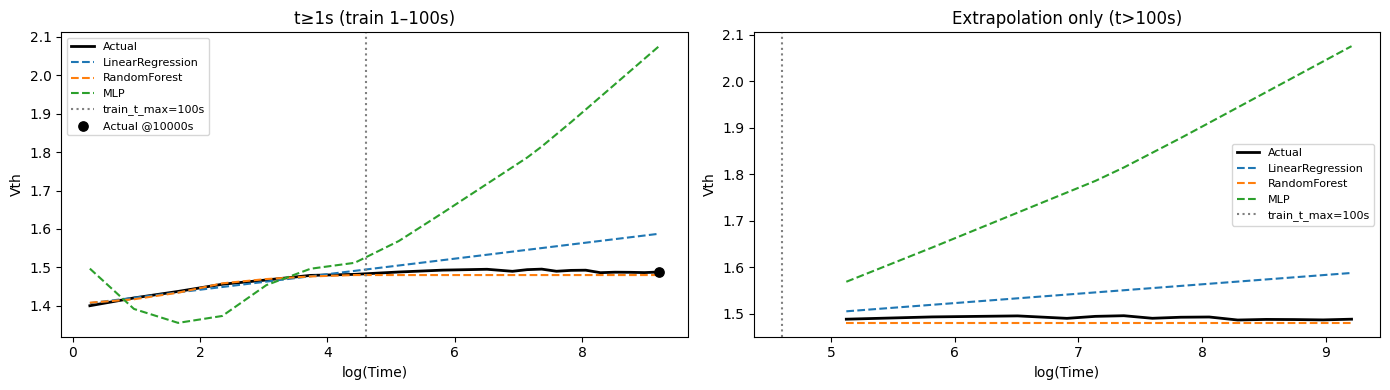

Tail metrics for t>100s (baselines only, no retrain):
  Linear: {'MSE': 0.0047293338572120276, 'RMSE': 0.06877015237159234, 'MAE': 0.06410704376704383, 'R2': -473.4207468981656}
  RF:     {'MSE': 0.00011726051455675789, 'RMSE': 0.010828689420089483, 'MAE': 0.010358178684290311, 'R2': -10.762929532421511}
  MLP:    {'MSE': 0.15446366940363312, 'RMSE': 0.3930186629202653, 'MAE': 0.36453910786186056, 'R2': -15493.945296651656}


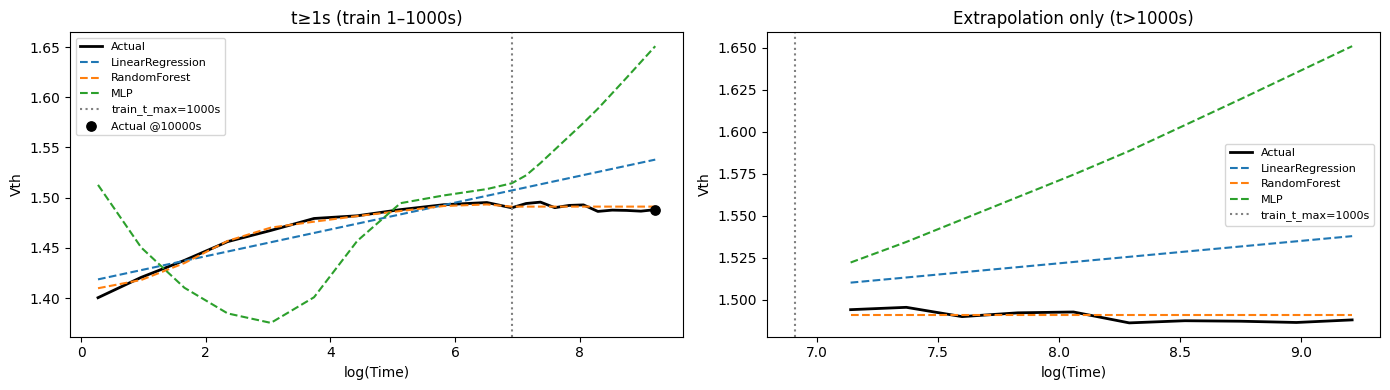

Tail metrics for t>1000s (baselines only, no retrain):
  Linear: {'MSE': 0.001290818184394165, 'RMSE': 0.03592795825529423, 'MAE': 0.033997729718746775, 'R2': -123.50486528968473}
  RF:     {'MSE': 1.1414283022119253e-05, 'RMSE': 0.003378503074161581, 'MAE': 0.0031137746439983127, 'R2': -0.10095580247367719}
  MLP:    {'MSE': 0.010703776116370804, 'RMSE': 0.10345905526521496, 'MAE': 0.09371528404854937, 'R2': -1031.4244107896345}


In [23]:
import numpy as np
import matplotlib.pyplot as plt


def _fit_baselines_no_retrain(df, train_t_max, train_t_min=1.0, epsilon=1e-9):
    t = df["t"].astype(float).values
    y = df["vth_average"].astype(float).values

    train_mask = (t >= train_t_min) & (t <= train_t_max)

    X_train = np.log(t[train_mask] + epsilon).reshape(-1, 1)
    y_train = y[train_mask]

    lin = LinearRegression().fit(X_train, y_train)

    rf = RandomForestRegressor(n_estimators=300, random_state=42)
    rf.fit(X_train, y_train)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=5000, random_state=42)
    mlp.fit(X_train_s, y_train)

    return {"lin": lin, "rf": rf, "mlp": mlp, "mlp_scaler": scaler}


def plot_filtered_curves_no_retrain(df, train_t_max, t_min_plot=1.0, epsilon=1e-9):
    t = df["t"].astype(float).values
    y = df["vth_average"].astype(float).values

    # Domain filters
    mask_plot = t >= t_min_plot
    mask_tail = t > train_t_max

    log_t = np.log(t + epsilon)

    # Fit baselines (fast)
    base = _fit_baselines_no_retrain(df, train_t_max=train_t_max, epsilon=epsilon)

    X_all = log_t.reshape(-1, 1)
    pred_lin = base["lin"].predict(X_all)
    pred_rf = base["rf"].predict(X_all)
    pred_mlp = base["mlp"].predict(base["mlp_scaler"].transform(X_all))

    # Target point (~10000s)
    idx_target = int(np.argmin(np.abs(t - 10000.0)))
    y_target = float(y[idx_target])
    x_target = float(log_t[idx_target])

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # (A) Full curve but only for t >= t_min_plot
    ax = axes[0]
    ax.plot(log_t[mask_plot], y[mask_plot], "k-", linewidth=2, label="Actual")
    ax.plot(log_t[mask_plot], pred_lin[mask_plot], "--", label="LinearRegression")
    ax.plot(log_t[mask_plot], pred_rf[mask_plot], "--", label="RandomForest")
    ax.plot(log_t[mask_plot], pred_mlp[mask_plot], "--", label="MLP")
    ax.axvline(np.log(train_t_max + epsilon), color="gray", linestyle=":", label=f"train_t_max={int(train_t_max)}s")

    # Mark actual endpoint at ~10000s
    ax.scatter([x_target], [y_target], color="black", s=45, zorder=6, label="Actual @10000s")

    ax.set_title(f"t≥{t_min_plot:g}s (train 1–{int(train_t_max)}s)")
    ax.set_xlabel("log(Time)")
    ax.set_ylabel("Vth")
    ax.legend(fontsize=8)

    # (B) Extrapolation region only (t > train_t_max)
    ax = axes[1]
    ax.plot(log_t[mask_tail], y[mask_tail], "k-", linewidth=2, label="Actual")
    ax.plot(log_t[mask_tail], pred_lin[mask_tail], "--", label="LinearRegression")
    ax.plot(log_t[mask_tail], pred_rf[mask_tail], "--", label="RandomForest")
    ax.plot(log_t[mask_tail], pred_mlp[mask_tail], "--", label="MLP")
    ax.axvline(np.log(train_t_max + epsilon), color="gray", linestyle=":", label=f"train_t_max={int(train_t_max)}s")

    ax.set_title(f"Extrapolation only (t>{int(train_t_max)}s)")
    ax.set_xlabel("log(Time)")
    ax.set_ylabel("Vth")
    ax.legend(fontsize=8)

    plt.tight_layout()
    plt.show()

    # Print tail metrics for baselines (no retrain beyond fitting these baselines)
    if mask_tail.sum() >= 2:
        print(f"Tail metrics for t>{train_t_max}s (baselines only, no retrain):")
        print("  Linear:", _safe_metrics(y[mask_tail], pred_lin[mask_tail]))
        print("  RF:    ", _safe_metrics(y[mask_tail], pred_rf[mask_tail]))
        print("  MLP:   ", _safe_metrics(y[mask_tail], pred_mlp[mask_tail]))


# Re-plot without the tiny-time region and without retraining any LSTM
plot_filtered_curves_no_retrain(data_23, train_t_max=100, t_min_plot=1.0)
plot_filtered_curves_no_retrain(data_23, train_t_max=1000, t_min_plot=1.0)


## LSTM + physics-regularized loss (Kong-style)

This mirrors the paper’s idea (Eq. 5): add penalties so the predicted degradation trajectory is
- monotonic increasing (first difference $\ge 0$)
- “accelerating” (second difference $\ge 0$)

For GaN Vth under stress (you confirmed it increases), we penalize negative first/second differences using ReLU.

We train only on early data ($t\in[1, t_{max}]$) and use the physics penalty across a dense time grid up to 10000s.

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def run_phys_lstm_window(
    df,
    train_t_max,
    target_t=10000.0,
    train_t_min=1.0,
    epsilon=1e-9,
    epochs=2000,
    lr=1e-3,
    alpha=1.0,
    beta=0.25,
    n_phys=256,
    patience=200,
    seed=42,
    verbose_every=200,
):
    """LSTM seq2seq over time with Kong-style physics loss on first/second differences."""

    tf.random.set_seed(seed)
    np.random.seed(seed)

    t = df["t"].astype(float).values
    y = df["vth_average"].astype(float).values

    train_mask = (t >= train_t_min) & (t <= train_t_max)
    test_mask = t > train_t_max

    if train_mask.sum() < 5:
        raise ValueError(f"Need >=5 train points in [{train_t_min}, {train_t_max}] (got {train_mask.sum()}).")
    if test_mask.sum() < 2:
        raise ValueError(f"Need >=2 test points for t>{train_t_max} (got {test_mask.sum()}).")

    # Feature: log time
    x_train = np.log(t[train_mask] + epsilon).reshape(-1, 1)
    y_train = y[train_mask].reshape(-1, 1)
    x_test = np.log(t[test_mask] + epsilon).reshape(-1, 1)
    y_test = y[test_mask]

    # Scale x and y based on training window (paper standardizes signals)
    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    x_train_s = x_scaler.fit_transform(x_train)
    y_train_s = y_scaler.fit_transform(y_train)
    x_test_s = x_scaler.transform(x_test)

    # Sequences (single batch)
    X_train_seq = tf.constant(x_train_s.reshape(1, -1, 1), dtype=tf.float32)
    Y_train_seq = tf.constant(y_train_s.reshape(1, -1, 1), dtype=tf.float32)
    X_test_seq = tf.constant(x_test_s.reshape(1, -1, 1), dtype=tf.float32)

    # Physics collocation grid from 1..target_t (log-spaced)
    t_phys = np.geomspace(train_t_min, target_t, n_phys)
    x_phys = np.log(t_phys + epsilon).reshape(-1, 1)
    x_phys_s = x_scaler.transform(x_phys)
    X_phys_seq = tf.constant(x_phys_s.reshape(1, -1, 1), dtype=tf.float32)

    # Model: sequence-to-sequence
    model = keras.Sequential(
        [
            layers.Input(shape=(None, 1)),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64, return_sequences=True),
            layers.Dense(32, activation="tanh"),
            layers.Dense(1),
        ]
    )

    optimizer = keras.optimizers.Adam(learning_rate=lr)

    def physics_terms(y_seq):
        # y_seq: (1, T, 1)
        dy = y_seq[:, 1:, :] - y_seq[:, :-1, :]
        d2y = y_seq[:, 2:, :] - 2.0 * y_seq[:, 1:-1, :] + y_seq[:, :-2, :]
        mono_pen = tf.reduce_mean(tf.nn.relu(-dy))
        curv_pen = tf.reduce_mean(tf.nn.relu(-d2y))
        return mono_pen, curv_pen

    best = np.inf
    best_weights = None
    wait = 0

    history = {"total": [], "data": [], "mono": [], "curv": []}

    for epoch in range(1, epochs + 1):
        with tf.GradientTape() as tape:
            yhat_train = model(X_train_seq, training=True)
            data_loss = tf.reduce_mean(tf.square(yhat_train - Y_train_seq))

            yhat_phys = model(X_phys_seq, training=True)
            mono_pen, curv_pen = physics_terms(yhat_phys)

            total_loss = data_loss + alpha * mono_pen + beta * curv_pen

        grads = tape.gradient(total_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        tl = float(total_loss.numpy())
        history["total"].append(tl)
        history["data"].append(float(data_loss.numpy()))
        history["mono"].append(float(mono_pen.numpy()))
        history["curv"].append(float(curv_pen.numpy()))

        if tl + 1e-9 < best:
            best = tl
            best_weights = model.get_weights()
            wait = 0
        else:
            wait += 1

        if verbose_every and epoch % verbose_every == 0:
            print(
                f"[{int(train_t_max)}s] epoch {epoch}/{epochs} | total={history['total'][-1]:.4g} "
                f"data={history['data'][-1]:.4g} mono={history['mono'][-1]:.4g} curv={history['curv'][-1]:.4g}"
            )

        if wait >= patience:
            break

    if best_weights is not None:
        model.set_weights(best_weights)

    # Predict held-out tail (t > train_t_max)
    yhat_test_s = model(X_test_seq, training=False).numpy().reshape(-1, 1)
    yhat_test = y_scaler.inverse_transform(yhat_test_s).reshape(-1)

    # Predict at target_t using a sequence ending at target (more stable than single-step)
    idx_target = int(np.argmin(np.abs(t - target_t)))
    t_target_actual = float(t[idx_target])
    y_target_actual = float(y[idx_target])
    x_target = np.log(np.array([[t_target_actual + epsilon]]))
    x_target_s = x_scaler.transform(x_target)

    X_eval = np.concatenate([x_train_s, x_target_s], axis=0).reshape(1, -1, 1)
    yhat_eval_s = model(tf.constant(X_eval, dtype=tf.float32), training=False).numpy()
    y_target_pred = float(y_scaler.inverse_transform(yhat_eval_s[:, -1, :]).reshape(-1)[0])

    m = _safe_metrics(y_test, yhat_test)

    row = {
        "Window": f"[1, {int(train_t_max)}]s",
        "Model": f"LSTM+Physics (alpha={alpha}, beta={beta})",
        "n_train": int(train_mask.sum()),
        "n_test": int(test_mask.sum()),
        "t_target": t_target_actual,
        "Vth_target_actual": y_target_actual,
        "Vth_target_pred": y_target_pred,
        "AbsErr@target": abs(y_target_actual - y_target_pred),
        "SqErr@target": (y_target_actual - y_target_pred) ** 2,
        "Test_MSE": m["MSE"],
        "Test_RMSE": m["RMSE"],
        "Test_MAE": m["MAE"],
        "Test_R2": m["R2"],
        "epochs_ran": len(history["total"]),
        "final_total_loss": history["total"][-1],
        "final_data_loss": history["data"][-1],
        "final_mono_pen": history["mono"][-1],
        "final_curv_pen": history["curv"][-1],
    }

    return row, history


# Run Kong-style LSTM+physics for the two windows and append to the baseline table
row_100, hist_100 = run_phys_lstm_window(data_23, train_t_max=100, epochs=2000, patience=200)
row_1000, hist_1000 = run_phys_lstm_window(data_23, train_t_max=1000, epochs=2000, patience=200)

phys_lstm_df = pd.DataFrame([row_100, row_1000])

comparison_df = pd.concat([baseline_df, phys_lstm_df], ignore_index=True)

print("\nCombined comparison (baseline + LSTM+physics), sorted by |error| at target:")
comparison_df.sort_values(["Window", "AbsErr@target"], ascending=[True, True])

[100s] epoch 200/2000 | total=0.001645 data=0.001158 mono=2.578e-07 curv=0.001948
[100s] epoch 400/2000 | total=0.001302 data=0.0008186 mono=0 curv=0.001934
[100s] epoch 600/2000 | total=0.001143 data=0.0006784 mono=0 curv=0.00186
[100s] epoch 800/2000 | total=0.0006659 data=0.0002173 mono=0 curv=0.001794
[100s] epoch 1000/2000 | total=0.0004599 data=3.114e-05 mono=0 curv=0.001715
[100s] epoch 1200/2000 | total=0.0004021 data=8.085e-06 mono=0 curv=0.001576
[100s] epoch 1400/2000 | total=0.0003557 data=7.846e-06 mono=0 curv=0.001391
[100s] epoch 1600/2000 | total=0.0002979 data=7.961e-06 mono=0 curv=0.00116
[100s] epoch 1800/2000 | total=0.0002293 data=4.75e-06 mono=0 curv=0.0008984
[100s] epoch 2000/2000 | total=0.0001639 data=5.279e-06 mono=0 curv=0.0006347
[1000s] epoch 200/2000 | total=0.002327 data=0.001855 mono=0 curv=0.001886
[1000s] epoch 400/2000 | total=0.00156 data=0.001085 mono=2.6e-07 curv=0.001901
[1000s] epoch 600/2000 | total=0.001282 data=0.0007495 mono=0 curv=0.002129


,Window,Model,n_train,n_test,t_target,Vth_target_actual,Vth_target_pred,AbsErr@target,SqErr@target,Test_MSE,Test_RMSE,Test_MAE,Test_R2,epochs_ran,final_total_loss,final_data_loss,final_mono_pen,final_curv_pen
7,"[1, 1000]s","LSTM+Physics (alpha=1.0, beta=0.25)",11,10,10000.0,1.488081,1.485548,0.002533,0.000006,0.000837,0.028938,0.024923,-79.772880,2000.0,0.000630,0.000259,0.0,0.001480
4,"[1, 1000]s",RandomForestRegressor,11,10,10000.0,1.488081,1.491088,0.003008,0.000009,0.000011,0.003379,0.003114,-0.100956,NaN,NaN,NaN,NaN,NaN
3,"[1, 1000]s",LinearRegression,11,10,10000.0,1.488081,1.537887,0.049806,0.002481,0.001291,0.035928,0.033998,-123.504865,NaN,NaN,NaN,NaN,NaN
5,"[1, 1000]s",MLPRegressor,11,10,10000.0,1.488081,1.650848,0.162767,0.026493,0.010704,0.103459,0.093715,-1031.424411,NaN,NaN,NaN,NaN,NaN
1,"[1, 100]s",RandomForestRegressor,7,14,10000.0,1.488081,1.480125,0.007955,0.000063,0.000117,0.010829,0.010358,-10.762930,NaN,NaN,NaN,NaN,NaN
6,"[1, 100]s","LSTM+Physics (alpha=1.0, beta=0.25)",7,14,10000.0,1.488081,1.469188,0.018893,0.000357,0.001503,0.038764,0.035139,-149.736866,2000.0,0.000164,0.000005,0.0,0.000635
0,"[1, 100]s",LinearRegression,7,14,10000.0,1.488081,1.587534,0.099453,0.009891,0.004729,0.068770,0.064107,-473.420747,NaN,NaN,NaN,NaN,NaN
2,"[1, 100]s",MLPRegressor,7,14,10000.0,1.488081,2.075325,0.587244,0.344856,0.154464,0.393019,0.364539,-15493.945297,NaN,NaN,NaN,NaN,NaN


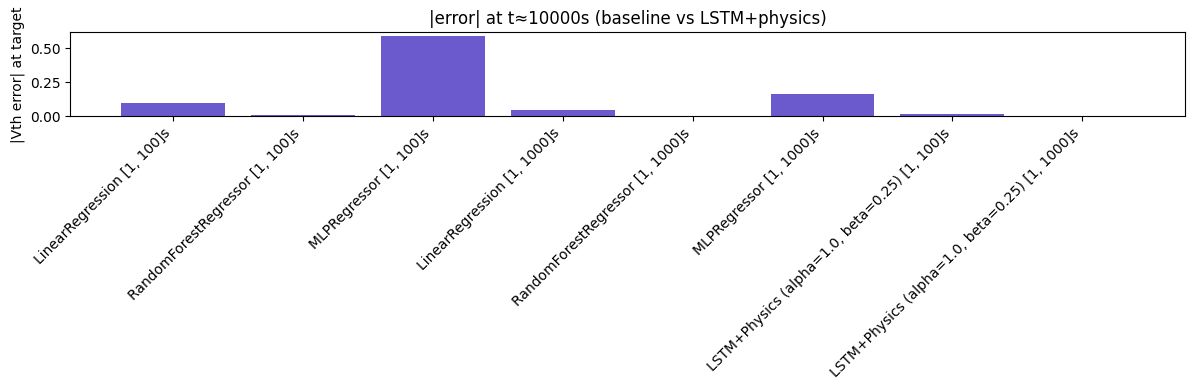

,Window,Model,AbsErr@target,Test_MSE,Test_RMSE,Test_MAE,Test_R2
7,"[1, 1000]s","LSTM+Physics (alpha=1.0, beta=0.25)",0.002533,0.000837,0.028938,0.024923,-79.772880
4,"[1, 1000]s",RandomForestRegressor,0.003008,0.000011,0.003379,0.003114,-0.100956
3,"[1, 1000]s",LinearRegression,0.049806,0.001291,0.035928,0.033998,-123.504865
5,"[1, 1000]s",MLPRegressor,0.162767,0.010704,0.103459,0.093715,-1031.424411
1,"[1, 100]s",RandomForestRegressor,0.007955,0.000117,0.010829,0.010358,-10.762930
6,"[1, 100]s","LSTM+Physics (alpha=1.0, beta=0.25)",0.018893,0.001503,0.038764,0.035139,-149.736866
0,"[1, 100]s",LinearRegression,0.099453,0.004729,0.068770,0.064107,-473.420747
2,"[1, 100]s",MLPRegressor,0.587244,0.154464,0.393019,0.364539,-15493.945297


In [26]:
# Visualize target absolute error including LSTM+physics
plt.figure(figsize=(12, 4))
plot_df2 = comparison_df.copy()
plot_df2["Label"] = plot_df2["Model"] + " " + plot_df2["Window"]
plt.bar(plot_df2["Label"], plot_df2["AbsErr@target"], color="slateblue")
plt.ylabel("|Vth error| at target")
plt.title(f"|error| at t≈{plot_df2['t_target'].iloc[0]:.0f}s (baseline vs LSTM+physics)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Optional: show the compact metrics view
comparison_df[["Window","Model","AbsErr@target","Test_MSE","Test_RMSE","Test_MAE","Test_R2"]].sort_values(["Window","AbsErr@target"])